## Three Observations from Reviewing the Data:
1. The Temperature data shows a clear peak near the equator, and a precipitous drop in temperature as latitude increases (average temperature hits freezing at about 45 degrees latitude.)
2. There appears to be no correlation between latitude and cloudiness or wind speed.
3. The data show the limited land in the southern hemisphere of the Earth compared to the northern hemisphere - with very little inhabited land below -50 degrees of latitude.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
from config import api_key
import requests
sns.set()

In [2]:
#create a list of latitude and longitude. We expect that when fed to citipy, some will return the same city.
#Some of these cities may also return a "no city found" when fed to openweathrmap.
#to ensure we have over 500 total data points, we will create a set of 2,000 lat/lon coordinates.

short_lat = np.random.uniform(-90, 90, 2000)
short_long = np.random.uniform(-180, 180, 2000)

s_lat = list(short_lat)
s_long = list(short_long)

lldf = pd.DataFrame({'lat': s_lat, 'long': s_long})
lldf.head()

,lat,long
0,-46.890154,64.714793
1,52.413919,34.474546
2,-20.922356,122.469888
3,-75.057274,-132.824971
4,60.722188,149.996215


In [3]:
#run through our coordinates and feed them into citipy

cities = []

for x in range(2000):
    cities.append(citipy.nearest_city(lldf.lat[x], lldf.long[x]))

In [4]:
#confirm the result from citipy is the correct length.

len(cities)

2000

In [5]:
#check to make sure that all the data is unique.

#First, make two lists, one for city names and one for country codes. We will make a dataframe from these and our retrieved data
city_name = []
country_code = []

for x in range(2000):
    city_name.append(cities[x].city_name)
    country_code.append(cities[x].country_code)

data = pd.DataFrame({'City': city_name, 'Country': country_code})


In [6]:
#check the data in the dataframe. We need 500 UNIQUE cities, so we need to check the uniques
len(data.City.unique())

762

In [7]:
#drop the duplicates.

data = data.drop_duplicates('City')

In [8]:
#knowing what the returns are from openweathermap, we can use these selection to build new lists for our
#items of interest.

#We will do this with a for loop using out 'data' dataframe. We will also add a try/except that will handle
#returns holding missing values.

#And for fun, we will count how many cities we fed to openweathermap were not found.

url = "http://api.openweathermap.org/data/2.5/weather?"

lat = []
cities = []
ids = []
clouds = []
wind = []
temp = []
humidity = []
not_found = 0

for x in data.index:
    query_url = url + 'appid=' + api_key + '&q=' + data.City[x] + ',' + data.Country[x] + '&units=imperial'
    response = requests.get(query_url).json()
    test_var = 0
    try:
        response['name']
    except:
        test_var = 1
        not_found = not_found + 1
    if test_var == 0:
        print('City Number: ' + str(response['id']) + ', City Name: ' + response['name'] + ', Request url: ' + query_url)
        cities.append(response['name'])
        ids.append(response['id'])
        lat.append(response['coord']['lat'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
print(str(not_found) + ' cities were not found in the OpenWeatherMap database.')

City Number: 935215, City Name: Saint-Philippe, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=saint-philippe,re&units=imperial
City Number: 534413, City Name: Lokot, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=lokot,ru&units=imperial
City Number: 2075720, City Name: Broome, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=broome,au&units=imperial
City Number: 4030556, City Name: Rikitea, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=rikitea,pf&units=imperial
City Number: 2120047, City Name: Ust-Omchug, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=ust-omchug,ru&units=imperial
City Number: 2522437, City Name: Adeje, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=ad

City Number: 1529376, City Name: Korla, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=korla,cn&units=imperial
City Number: 2126682, City Name: Bilibino, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=bilibino,ru&units=imperial
City Number: 3883457, City Name: Lebu, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=lebu,cl&units=imperial
City Number: 5855927, City Name: Hilo, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=hilo,us&units=imperial
City Number: 241131, City Name: Victoria, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=victoria,sc&units=imperial
City Number: 3863379, City Name: Mar del Plata, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=mar del plata,ar&un

City Number: 2181625, City Name: Te Anau, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=te anau,nz&units=imperial
City Number: 2014833, City Name: Tura, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=tura,ru&units=imperial
City Number: 2176639, City Name: Batemans Bay, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=batemans bay,au&units=imperial
City Number: 933995, City Name: Souillac, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=souillac,mu&units=imperial
City Number: 777019, City Name: Vardo, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=vardo,no&units=imperial
City Number: 3515938, City Name: Teopisca, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=teopisca,mx

City Number: 556268, City Name: Ostrovnoy, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=ostrovnoy,ru&units=imperial
City Number: 1488903, City Name: Turukhansk, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=turukhansk,ru&units=imperial
City Number: 161616, City Name: Balkanabat, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=balkanabat,tm&units=imperial
City Number: 337405, City Name: Gambela, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=gambela,et&units=imperial
City Number: 1337607, City Name: Kudahuvadhoo, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=kudahuvadhoo,mv&units=imperial
City Number: 2339937, City Name: Gusau, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792

City Number: 2401495, City Name: Booue, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=booue,ga&units=imperial
City Number: 3418910, City Name: Upernavik, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=upernavik,gl&units=imperial
City Number: 57000, City Name: Hobyo, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=hobyo,so&units=imperial
City Number: 2019935, City Name: Mnogovershinnyy, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=mnogovershinnyy,ru&units=imperial
City Number: 1734240, City Name: Labuan, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=labuan,my&units=imperial
City Number: 3424934, City Name: Saint-Pierre, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q

City Number: 1337613, City Name: Kulhudhuffushi, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=kulhudhuffushi,mv&units=imperial
City Number: 2293045, City Name: Alepe, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=alepe,ci&units=imperial
City Number: 2017215, City Name: Sangar, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=sangar,ru&units=imperial
City Number: 2411397, City Name: Georgetown, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=georgetown,sh&units=imperial
City Number: 3837056, City Name: San Luis, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=san luis,ar&units=imperial
City Number: 2192362, City Name: Christchurch, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792

City Number: 2132606, City Name: Samarai, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=samarai,pg&units=imperial
City Number: 1056899, City Name: Sambava, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=sambava,mg&units=imperial
City Number: 6138501, City Name: Saint-Augustin, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=saint-augustin,ca&units=imperial
City Number: 3401148, City Name: Cururupu, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=cururupu,br&units=imperial
City Number: 1215502, City Name: Banda Aceh, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=banda aceh,id&units=imperial
City Number: 228418, City Name: Nakasongola, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840

City Number: 3836669, City Name: San Rafael, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=san rafael,ar&units=imperial
City Number: 2216645, City Name: Hun, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=hun,ly&units=imperial
City Number: 3401225, City Name: Amapa, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=amapa,br&units=imperial
City Number: 1090397, City Name: Bandrele, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=bandrele,yt&units=imperial
City Number: 3872154, City Name: San Javier, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=san javier,cl&units=imperial
City Number: 366426, City Name: Tandalti, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=tandalti,s

City Number: 2013921, City Name: Ust-Kuyga, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=ust-kuyga,ru&units=imperial
City Number: 1293625, City Name: Dawei, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=dawei,mm&units=imperial
City Number: 1811729, City Name: Jinji, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=jinji,cn&units=imperial
City Number: 1129516, City Name: Qarqin, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=qarqin,af&units=imperial
City Number: 2027044, City Name: Batagay, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=batagay,ru&units=imperial
City Number: 1736356, City Name: Tumpat, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=tumpat,my&units=imp

City Number: 3979962, City Name: Adolfo Lopez Mateos, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=adolfo lopez mateos,mx&units=imperial
City Number: 1264976, City Name: Leh, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=leh,in&units=imperial
City Number: 1630662, City Name: Praya, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=praya,id&units=imperial
City Number: 1214658, City Name: Lhokseumawe, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=lhokseumawe,id&units=imperial
City Number: 1516589, City Name: Zhezkazgan, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=zhezkazgan,kz&units=imperial
City Number: 3106492, City Name: Valls, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e

City Number: 1337619, City Name: Ugoofaaru, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=ugoofaaru,mv&units=imperial
City Number: 157366, City Name: Kimamba, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=kimamba,tz&units=imperial
City Number: 3470718, City Name: Barra do Bugres, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=barra do bugres,br&units=imperial
City Number: 3357114, City Name: Grootfontein, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=grootfontein,na&units=imperial
City Number: 5853992, City Name: Wahiawa, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=wahiawa,us&units=imperial
City Number: 1033356, City Name: Nampula, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a886

City Number: 602150, City Name: Umea, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=umea,se&units=imperial
City Number: 1566559, City Name: Tay Ninh, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=tay ninh,vn&units=imperial
City Number: 2374583, City Name: Bubaque, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=bubaque,gw&units=imperial
City Number: 2334008, City Name: Kontagora, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=kontagora,ng&units=imperial
City Number: 60019, City Name: Eyl, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=eyl,so&units=imperial
City Number: 3573374, City Name: The Valley, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=the valley,ai&units=

City Number: 2446796, City Name: Bilma, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=bilma,ne&units=imperial
City Number: 3388760, City Name: Sao Geraldo do Araguaia, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=sao geraldo do araguaia,br&units=imperial
City Number: 3662762, City Name: Porto Velho, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=porto velho,br&units=imperial
City Number: 484907, City Name: Sambek, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=sambek,ru&units=imperial
City Number: 2063042, City Name: Port Hedland, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=port hedland,au&units=imperial
City Number: 933726, City Name: Hukuntsi, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8d

City Number: 2634032, City Name: Whitley Bay, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=whitley bay,gb&units=imperial
City Number: 1803422, City Name: Linhai, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=linhai,cn&units=imperial
City Number: 1849876, City Name: Yamada, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=yamada,jp&units=imperial
City Number: 1328421, City Name: Pathein, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=pathein,mm&units=imperial
City Number: 2026861, City Name: Berdigestyakh, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&q=berdigestyakh,ru&units=imperial
City Number: 6151264, City Name: Sooke, Request url: http://api.openweathermap.org/data/2.5/weather?appid=2c8dfe7bb38da9a8863840e792873714&

In [9]:
#check the length of one of our lists to ensure we have over 500 data points.

len(temp)

662

In [10]:
#write the output of our results to a .csv

output_csv = pd.DataFrame({
    'City ID': ids, 
    'City Name': cities, 
    'Latitude': lat, 
    'Temperature': temp, 
    'Cloudiness': clouds,
    'Humidity': humidity,
    'Wind': wind,
})
output_csv.to_csv('Global_latitude_data.csv')

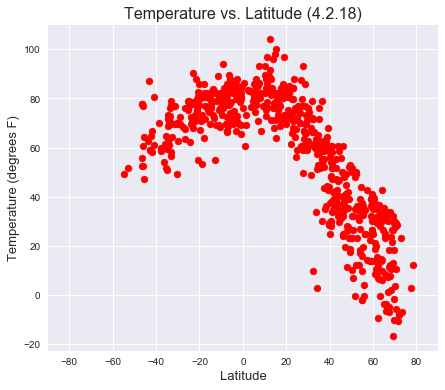

In [18]:
#plot the temperature data

plt.figure(figsize=(7,6))
plt.scatter(x=lat, y=temp, color='red')
plt.xlim(-90,90)
plt.title('Temperature vs. Latitude (4.2.18)', size=16)
plt.xlabel('Latitude', size=13)
plt.ylabel('Temperature (degrees F)', size = 13)
plt.show()

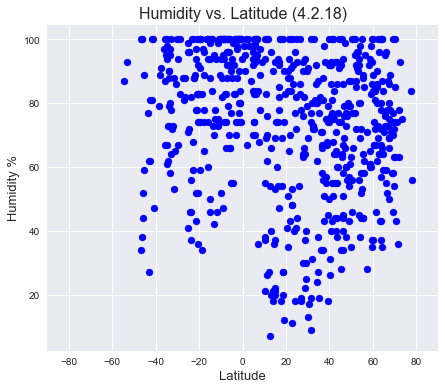

In [17]:
#plot our humidity data

plt.figure(figsize=(7,6))
plt.scatter(x=lat, y=humidity, color='blue')
plt.title('Humidity vs. Latitude (4.2.18)', size=16)
plt.xlabel('Latitude', size=13)
plt.ylabel('Humidity %', size = 13)
plt.xlim(-90,90)
plt.show()

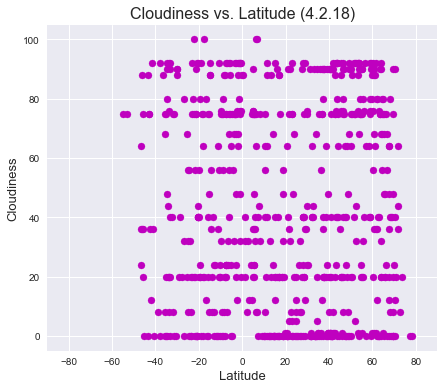

In [16]:
#plot cloudiness vs. latitude

plt.figure(figsize=(7,6))
plt.scatter(x=lat, y=clouds, color='m')
plt.title('Cloudiness vs. Latitude (4.2.18)', size=16)
plt.xlabel('Latitude', size=13)
plt.ylabel('Cloudiness', size = 13)
plt.xlim(-90,90)
plt.show()

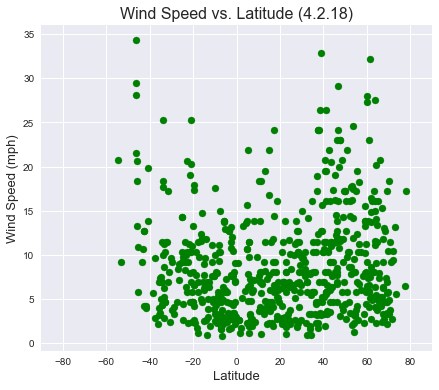

In [15]:
#plot wind speed vs. latitude

plt.figure(figsize=(7,6))
plt.scatter(x=lat, y=wind, color='green')
plt.title('Wind Speed vs. Latitude (4.2.18)', size=16)
plt.xlabel('Latitude', size=13)
plt.ylabel('Wind Speed (mph)', size = 13)
plt.xlim(-90,90)
plt.show()